In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

# Set column width (optional)
pd.set_option('display.max_colwidth', None)

# Prevent line wrapping in rows
pd.set_option('display.expand_frame_repr', False)

In [ ]:
test_id="YOUR_TEST_ID_HERE"

In [3]:
original_df=pd.read_csv(f'benchmarks/benchmark_results_{test_id}.csv')
def return_failed_tests(test_id:str):
    """
    Returns a DataFrame containing the failed tests from the 'test_results.csv' file.
    The DataFrame includes the test name, status, and error message.
    """
    # Load the CSV file into a DataFrame
    df = pd.read_csv(f'benchmarks/benchmark_results_{test_id}.csv')
    
    return df
total_tests = len(original_df)
successes = original_df["verdict"].sum()
failures = (~original_df["verdict"]).sum()
accuracy = successes / total_tests if total_tests > 0 else float('nan')
avg_duration = original_df["duration (sec)"].mean()
avg_tokens = original_df["total_tokens"].mean()
type_accuracy = original_df.groupby("type")["verdict"].mean()
dataset=pd.read_csv("dataset_reformulated.csv")
df = return_failed_tests(test_id)
df = df.merge(dataset[["questions","difficulty"]], left_on="question", right_on="questions", how="left", suffixes=('', '_dataset'))
df = df.loc[:, ~df.columns.duplicated()]
print("Total tests:", total_tests)
print("Successes:", successes)
print("Failures:", failures)
print("Accuracy: {:.2%}".format(accuracy))
print("Average duration (sec):", avg_duration)
print("Average total tokens:", avg_tokens)
print("Accuracy by question type:")
for t, acc in type_accuracy.items():
    print(f"  {t}: {acc:.2%}")

Total tests: 100
Successes: 83
Failures: 17
Accuracy: 83.00%
Average duration (sec): 80.28078249494949
Average total tokens: 18667.24
Accuracy by question type:
  OOS: 92.31%
  Ordinary: 81.61%


In [ ]:
df[df["verdict"]==False]

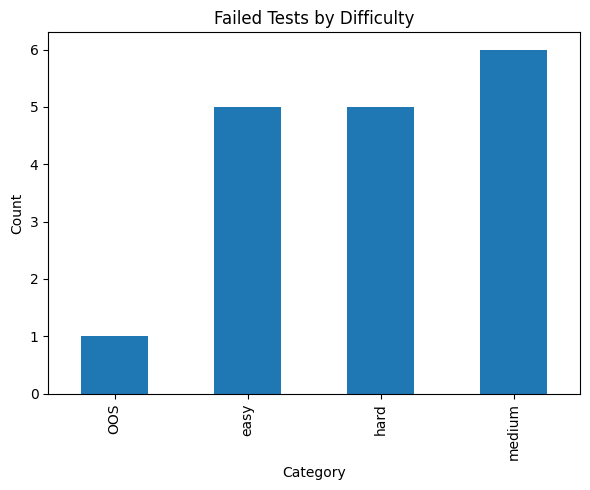

In [41]:
import matplotlib.pyplot as plt

failed_difficulty = df[df["verdict"] == False]["difficulty"].value_counts()
failed_oos_type = df[(df["verdict"] == False) & (df["type"] == "OOS")]["type"].value_counts()

data=failed_difficulty
data=data.add(failed_oos_type, fill_value=0)
fig, ax = plt.subplots(figsize=(6, 5))
data.plot(kind="bar", ax=ax, title="Failed Tests by Difficulty")
ax.set_xlabel("Category")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

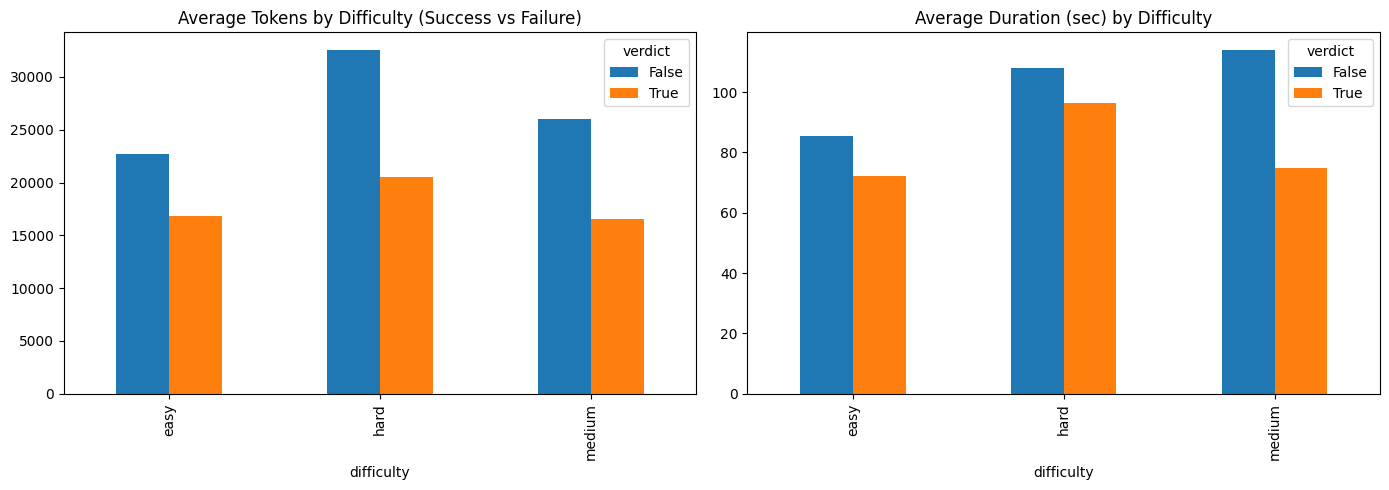

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.groupby(["difficulty", "verdict"])["total_tokens"].mean().unstack().plot(
    kind='bar',
    ax=axes[0],
    title='Average Tokens by Difficulty (Success vs Failure)'
)

df.groupby(["difficulty","verdict"])["duration (sec)"].mean().unstack().plot(
    kind="bar",
    ax=axes[1],
    title="Average Duration (sec) by Difficulty"
)

plt.tight_layout()
plt.show()

In [ ]:
import json

import ast

df["method"] = df["raw_judge_output"].apply(lambda x: ast.literal_eval(x)["method"])

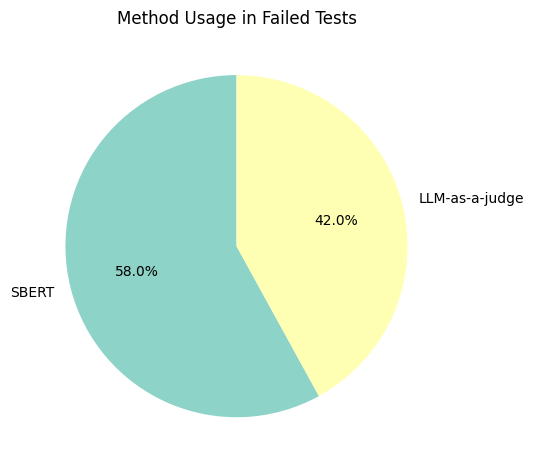

In [60]:
colors = plt.get_cmap("Set3").colors
ax = df["method"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    legend=False,
    ylabel="",
    title="Method Usage in Failed Tests"
)
ax.set_ylabel("")
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()